In [51]:
import numpy as np
import matplotlib.pyplot as plt

In [52]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [61]:
class LSTMCell:
    def __init__(self, input_size, hidden_size):
        self.input_size = input_size
        self.hidden_size = hidden_size

        # Initialize weights and biases
        self.Wf = np.random.randn(hidden_size, input_size + hidden_size)
        self.Wi = np.random.randn(hidden_size, input_size + hidden_size)
        self.Wo = np.random.randn(hidden_size, input_size + hidden_size)
        self.Wc = np.random.randn(hidden_size, input_size + hidden_size)

        self.bf = np.zeros((hidden_size, 1))
        self.bi = np.zeros((hidden_size, 1))
        self.bo = np.zeros((hidden_size, 1))
        self.bc = np.zeros((hidden_size, 1))

    def forward(self, x, h_prev, c_prev):
        # Concatenate input and previous hidden state
        concat = np.concatenate((h_prev, x), axis=0)

        # Compute gates and candidate cell state
        f = sigmoid(np.dot(self.Wf, concat) + self.bf)
        i = sigmoid(np.dot(self.Wi, concat) + self.bi)
        o = sigmoid(np.dot(self.Wo, concat) + self.bo)
        c_tilde = np.tanh(np.dot(self.Wc, concat) + self.bc)

        # Update cell state and hidden state
        c = f * c_prev + i * c_tilde
        h = o * np.tanh(c)

        return h, c

In [62]:
# Define the vocabulary
vocab = {'I': 0, 'love': 1, 'deep': 2, 'learning': 3}
vocab_size = len(vocab)

In [63]:
# Sentence to process
sentence = "I love deep learning"

In [64]:
# Initialize LSTM cell
lstm = LSTMCell(vocab_size, 10)

In [65]:
# Initialize hidden state and cell state
h = np.zeros((10, 1))
c = np.zeros((10, 1))

In [66]:
# Store hidden states for visualization
hidden_states = []

In [67]:
# Process the sentence
for word in sentence.split():
    # Convert word to one-hot encoding
    x = np.zeros((vocab_size, 1))
    x[vocab[word]] = 1

    # Forward pass through LSTM cell
    h, c = lstm.forward(x, h, c)

    # Store the hidden state for visualization
    hidden_states.append(h.flatten())

    # Print the hidden state
    print(f"Word: {word}\n Hidden State: {h.T}\n")

Word: I
 Hidden State: [[ 0.01857495 -0.03546422  0.17429513  0.02932181 -0.07155253 -0.04887262
   0.0797293  -0.05098656  0.07566955 -0.07868071]]

Word: love
 Hidden State: [[ 0.11182444 -0.04419516 -0.01757879 -0.19711516 -0.33614225 -0.31560288
   0.11502736 -0.08163722  0.40591451  0.05088666]]

Word: deep
 Hidden State: [[ 0.13293759 -0.04186572 -0.10502941 -0.27068892 -0.07045424 -0.10609598
   0.22487618  0.10015639  0.23988284  0.32077691]]

Word: learning
 Hidden State: [[ 0.03025343 -0.15846042  0.00277063 -0.0852842   0.00595023 -0.06451884
   0.03500239  0.41298422  0.30680799 -0.2491493 ]]



In [68]:
# Convert hidden states to a NumPy array for plotting
hidden_states = np.array(hidden_states)

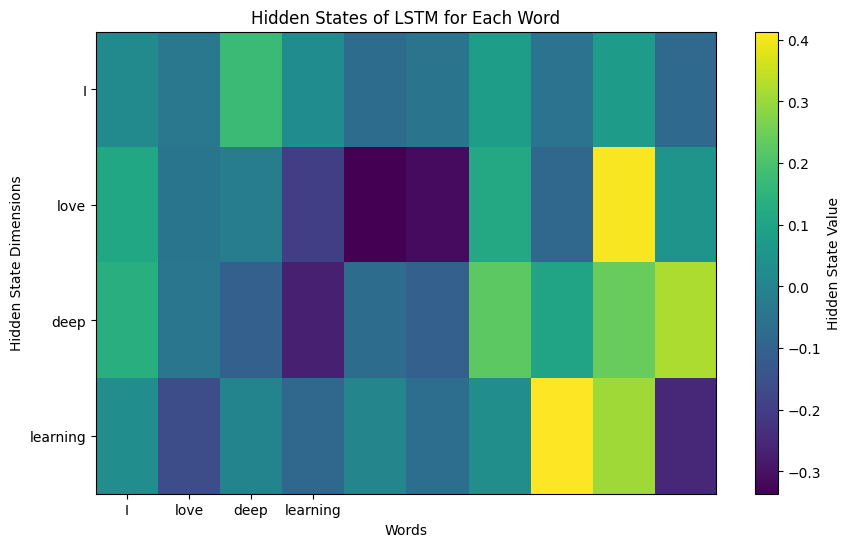

In [69]:
plt.figure(figsize=(10, 6))
plt.imshow(hidden_states, aspect='auto', cmap='viridis')
plt.colorbar(label='Hidden State Value')
plt.xticks(ticks=np.arange(vocab_size), labels=vocab.keys())
plt.yticks(ticks=np.arange(len(sentence.split())), labels=sentence.split())
plt.title('Hidden States of LSTM for Each Word')
plt.xlabel('Words')
plt.ylabel('Hidden State Dimensions')
plt.show()